In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import datetime
import locale
import re

import gensim
from gensim.utils import simple_preprocess 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, LdaMulticore
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')

unable to import 'smart_open.gcs', disabling that module
[nltk_data] Downloading package wordnet to C:\Users\stef
[nltk_data]     info\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\stef
[nltk_data]     info\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd

trustpilot = pd.read_csv('McDonalds_Champs_Elysees-Paris_Ile_de_France.csv')
trustpilot.head(3)

,review_body,review_date
0,Have to admit I am not a great fan of McDonald...,"February 29, 2020"
1,Food was fine. Staff were undesirably rude!Fam...,"February 15, 2020"
2,We went here to enjoy the Golden Arches fries....,"November 5, 2019"


In [7]:
trustpilot.columns

Index(['review_date'], dtype='object')

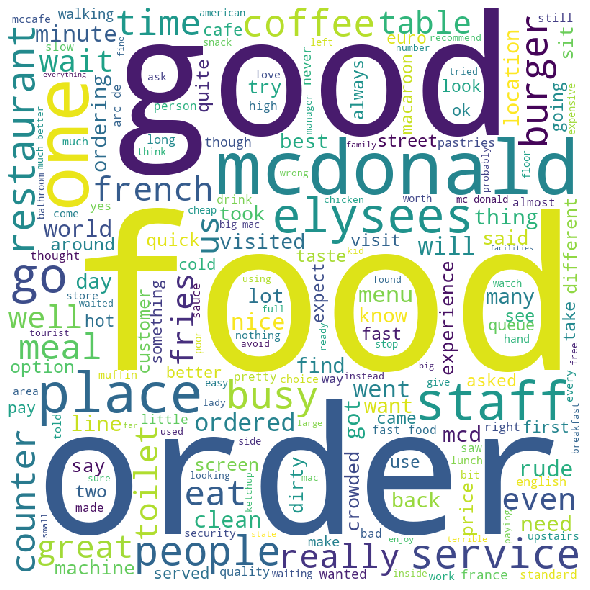

In [21]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

comment_words = '' 
stopwords = set(STOPWORDS) 
stop_word=list(stopwords)+['mcdonald','MCDONALD','paris','donald','mcdonalds','mcdona','ld','champs','elysee']
  
# iterate through the csv file 
for val in trustpilot.review_body: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_word, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
stem = SnowballStemmer('french')
sp =stopwords.words('french')

def tokenize_text(text):
    return simple_preprocess(text)

def stemm_text (text):
    return stem.stem(text)
    
def preprocess(text):
    results = []
    for word in tokenize_text(text.lower()):
        if word not in sp :  
            results.append(stemm_text(word))
    return results        

In [24]:
processed_docs = trustpilot['review_body'].map(preprocess)
processed_docs[:10]

0    [hav, to, admit, am, not, great, fan, of, mcdo...
1    [food, was, fin, staff, wer, undesirably, rud,...
2    [we, went, her, to, enjoy, the, golden, arche,...
3    [when, visited, this, mcdonald, was, excited, ...
4    [this, restaurent, was, mad, uprad, from, the,...
5    [the, wait, for, the, women, toilet, was, min,...
6    [do, you, know, how, they, call, doubl, bigmac...
7    [for, busy, locat, servic, was, fast, and, fri...
8    [staff, appear, disorganized, and, unmotivated...
9    [had, two, chees, and, egg, mcmuffin, coffe, a...
Name: review_body, dtype: object

In [27]:
trustpilot['review_body']=processed_docs

In [29]:
trustpilot.head()

,review_body,review_date
0,"[hav, to, admit, am, not, great, fan, of, mcdo...","February 29, 2020"
1,"[food, was, fin, staff, wer, undesirably, rud,...","February 15, 2020"
2,"[we, went, her, to, enjoy, the, golden, arche,...","November 5, 2019"
3,"[when, visited, this, mcdonald, was, excited, ...","November 2, 2019"
4,"[this, restaurent, was, mad, uprad, from, the,...","October 2, 2019"


In [33]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 actively
1 admit
2 almost
3 alway
4 am
5 ample
6 an
7 and
8 any
9 anymor
10 arc


In [34]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [35]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[20]

[(3, 1),
 (7, 2),
 (8, 1),
 (12, 1),
 (15, 1),
 (16, 1),
 (22, 1),
 (28, 1),
 (37, 1),
 (43, 1),
 (44, 1),
 (50, 1),
 (64, 1),
 (66, 2),
 (75, 1),
 (77, 4),
 (79, 2),
 (82, 1),
 (86, 2),
 (91, 2),
 (122, 2),
 (123, 1),
 (125, 1),
 (136, 1),
 (143, 1),
 (144, 1),
 (145, 2),
 (160, 1),
 (173, 1),
 (177, 1),
 (178, 1),
 (179, 1),
 (180, 2),
 (181, 1),
 (182, 1),
 (183, 1),
 (184, 1),
 (185, 1),
 (186, 1),
 (187, 1),
 (188, 1)]

In [37]:
bow_doc_10 = bow_corpus[10]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], dictionary[bow_doc_10[i][0]], bow_doc_10[i][1]))

Word 0 ("almost") appears 1 time.
Word 1 ("alway") appears 1 time.
Word 2 ("am") appears 2 time.
Word 3 ("an") appears 2 time.
Word 4 ("any") appears 2 time.
Word 5 ("arc") appears 1 time.
Word 6 ("are") appears 3 time.
Word 7 ("at") appears 2 time.
Word 8 ("be") appears 7 time.
Word 9 ("bet") appears 1 time.
Word 10 ("big") appears 1 time.
Word 11 ("busy") appears 1 time.
Word 12 ("but") appears 3 time.
Word 13 ("by") appears 1 time.
Word 14 ("caf") appears 1 time.
Word 15 ("can") appears 2 time.
Word 16 ("champ") appears 1 time.
Word 17 ("coffe") appears 1 time.
Word 18 ("cup") appears 2 time.
Word 19 ("different") appears 1 time.
Word 20 ("do") appears 1 time.
Word 21 ("eat") appears 2 time.
Word 22 ("elyse") appears 1 time.
Word 23 ("euros") appears 2 time.
Word 24 ("even") appears 2 time.
Word 25 ("ever") appears 1 time.
Word 26 ("fast") appears 1 time.
Word 27 ("find") appears 1 time.
Word 28 ("food") appears 2 time.
Word 29 ("for") appears 4 time.
Word 30 ("found") appears 1 tim

# Creer le modele

In [38]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.0942724919402102), (1, 0.08513678371293218), (2, 0.20036661723980542), (3, 0.11103765954894741), (4, 0.14018051761192332), (5, 0.07976644652202693), (6, 0.11086534091030176), (7, 0.07625135433144432), (8, 0.36943776033782794), (9, 0.07129268313380356), (10, 0.08513678371293218), (11, 0.06191253113268199), (12, 0.08262061832599346), (13, 0.06017936621701745), (14, 0.08145006507495937), (15, 0.10687753548891722), (16, 0.03976250411914167), (17, 0.06571850218333808), (18, 0.20036661723980542), (19, 0.07522589112398799), (20, 0.06281891974558017), (21, 0.12563783949116034), (22, 0.04795706820654028), (23, 0.19415976484516922), (24, 0.12943984323011282), (25, 0.08513678371293218), (26, 0.0667521277357646), (27, 0.0738556298423344), (28, 0.05620255302908544), (29, 0.09168145265693468), (30, 0.10365264394133174), (31, 0.06375408735998524), (32, 0.09707988242258461), (33, 0.16234779309492775), (34, 0.1884567592367405), (35, 0.10018330861990271), (36, 0.06808715872092132), (37, 0.1332973

In [39]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [40]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.030*"is" + 0.026*"you" + 0.026*"had" + 0.026*"order" + 0.021*"we" + 0.020*"at" + 0.017*"her" + 0.016*"your" + 0.014*"my" + 0.014*"hav"
Topic: 1 
Words: 0.030*"we" + 0.024*"is" + 0.023*"mcdonald" + 0.020*"food" + 0.020*"you" + 0.020*"not" + 0.015*"are" + 0.014*"ther" + 0.014*"this" + 0.012*"they"
Topic: 2 
Words: 0.024*"wer" + 0.023*"but" + 0.021*"with" + 0.018*"plac" + 0.016*"no" + 0.016*"very" + 0.016*"good" + 0.014*"all" + 0.014*"out" + 0.014*"be"
Topic: 3 
Words: 0.039*"you" + 0.037*"for" + 0.030*"is" + 0.020*"mcdonald" + 0.019*"but" + 0.019*"food" + 0.018*"this" + 0.016*"hav" + 0.015*"they" + 0.014*"order"
Topic: 4 
Words: 0.039*"is" + 0.028*"for" + 0.028*"mcdonald" + 0.026*"not" + 0.019*"but" + 0.015*"that" + 0.015*"good" + 0.015*"champ" + 0.014*"at" + 0.014*"are"
Topic: 5 
Words: 0.031*"toilet" + 0.029*"for" + 0.023*"is" + 0.021*"you" + 0.020*"but" + 0.017*"food" + 0.015*"are" + 0.013*"wer" + 0.013*"that" + 0.013*"with"
Topic: 6 
Words: 0.069*"we" + 0.038*"wer"

In [41]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.016*"we" + 0.015*"great" + 0.012*"find" + 0.011*"but" + 0.011*"caf" + 0.011*"full" + 0.011*"with" + 0.010*"had" + 0.010*"when" + 0.009*"mcdonald"
Topic: 1 Word: 0.014*"very" + 0.013*"mac" + 0.013*"that" + 0.013*"friendly" + 0.013*"servic" + 0.013*"had" + 0.012*"food" + 0.011*"wer" + 0.011*"com" + 0.011*"one"
Topic: 2 Word: 0.013*"good" + 0.012*"don" + 0.010*"really" + 0.010*"coffe" + 0.009*"food" + 0.009*"ordered" + 0.009*"staff" + 0.009*"over" + 0.009*"cheap" + 0.008*"are"
Topic: 3 Word: 0.012*"you" + 0.012*"dirty" + 0.011*"floor" + 0.011*"from" + 0.011*"mc" + 0.011*"toilet" + 0.010*"what" + 0.010*"mor" + 0.010*"not" + 0.009*"most"
Topic: 4 Word: 0.013*"rud" + 0.012*"out" + 0.011*"order" + 0.011*"machin" + 0.011*"french" + 0.011*"you" + 0.010*"food" + 0.010*"wer" + 0.010*"but" + 0.010*"busy"
Topic: 5 Word: 0.012*"you" + 0.011*"my" + 0.011*"they" + 0.010*"great" + 0.010*"would" + 0.010*"we" + 0.009*"be" + 0.009*"if" + 0.008*"but" + 0.008*"this"
Topic: 6 Word: 0.013*"yo

In [55]:
processed_docs[100]

['it',
 'get',
 'really',
 'uncomfort',
 'conveying',
 'order',
 'in',
 'english',
 'to',
 'the',
 'staff',
 'ther',
 'after',
 'repeatedly',
 'taking',
 'the',
 'wrong',
 'order',
 'they',
 'started',
 'being',
 'rud',
 'instead',
 'of',
 'being',
 'apologetic']

In [53]:
for index, score in sorted(lda_model[bow_corpus[20]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6499330997467041	 
Topic: 0.030*"mcdonald" + 0.029*"we" + 0.018*"is" + 0.017*"that" + 0.016*"but" + 0.015*"very" + 0.015*"at" + 0.015*"you" + 0.014*"this" + 0.014*"wer"

Score: 0.3349674344062805	 
Topic: 0.069*"we" + 0.038*"wer" + 0.029*"for" + 0.024*"that" + 0.020*"with" + 0.019*"at" + 0.018*"had" + 0.015*"but" + 0.015*"champ" + 0.013*"so"
